<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/Advance_Regression/02-04-02-multilevel-random-slope-r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 2. Random Slope Model

Random Slope Model is a type of mixed-effects model that allows the slope of the relationship between a predictor and the outcome to vary across groups, in addition to allowing the intercept to vary. This is an extension of the random intercept model. In this tutorial, we will learn about random slope models, their key features, and how to estimate the parameters of a random slope model from scratch. We will also apply random slope models to the popularity data set using the {lme4} package in R.


## Overview

A **random slope model** is a type of **mixed-effects model** that allows the **slope** of the relationship between a predictor and the outcome to vary across groups, in addition to allowing the **intercept** to vary. This is an extension of the **random intercept model**.

For an observation $y_{ij}$ (outcome for individual $j$ in group $i$):

$$ y_{ij} = (\beta_0 + u_{0i}) + (\beta_1 + u_{1i})x_{ij} + \epsilon_{ij} $$

Where:

- $\beta_0$: Fixed intercept (overall baseline level across all groups).

- $u_{0i}$: Random intercept for group $i$, representing deviations from the fixed intercept. Assumed $u_{0i} \sim N(0, \sigma_{u_0}^2)$.

- $\beta_1$: Fixed slope (average effect of the predictor across all groups).

- $u_{1i}$: Random slope for group $i$, representing deviations from the fixed slope. Assumed $u_{1i} \sim N(0, \sigma_{u_1}^2)$.

- $x_{ij}$: Predictor variable for individual $j$ in group $i$.

- $\epsilon_{ij}$: Residual error for individual $j$ in group $i$. Assumed $\epsilon_{ij} \sim N(0, \sigma_\epsilon^2)$.


The random slope model decomposes the variability in $y_{ij}$ into:

1. **Between-group variance**:

   - Variance of random intercepts ($\sigma_{u_0}^2$): Measures differences in baseline scores between groups.

   - Variance of random slopes (\( \sigma_{u_1}^2 \)): Measures differences in the effect of the predictor between groups.

2. **Within-group variance**:

   - Variance of residual errors ($\sigma_\epsilon^2$): Measures individual-level variability within groups.

3. **Correlation between random effects**:

   - Correlation $\rho$ between $u_{0i}$ (random intercept) and $u_{1i}$ (random slope) indicates whether groups with higher intercepts tend to have steeper or shallower slopes.

### Key Features

1. **Intercept and Slope Vary by Group**:

   - Each group has its own intercept:

    $$ \text{Intercept for group } i = \beta_0 + u_{0i} $$
   
   - Each group also has its own slope:

   $$ Slope for group i= \beta_i + u_{1i} $$

   
2. **Group-Specific Relationships**:

   - Allows groups to have different relationships between the predictor ($x$) and the outcome ($y$).

3. **Random Effects Correlation**:

   - The model can estimate the correlation between random intercepts ($u_{0i}$) and random slopes $u_{1i}$, capturing how group-specific intercepts and slopes are related.


***Variance Components***

The random slope model decomposes the variability in $y_{ij}$ into:

1. **Between-group variance**:

   - Variance of random intercepts ($\sigma_{u_0}^2$): Measures differences in baseline scores between groups.

   - Variance of random slopes (\( \sigma_{u_1}^2 \)): Measures differences in the effect of the predictor between groups.

2. **Within-group variance**:

   - Variance of residual errors ($\sigma_\epsilon^2$): Measures individual-level variability within groups.

3. **Correlation between random effects**:

   - Correlation $\rho$ between $u_{0i}$ (random intercept) and $u_{1i}$ (random slope) indicates whether groups with higher intercepts tend to have steeper or shallower slopes.

### Example

We are modeling students' test scores ($y$) based on their study hours ($x$), with both the baseline score and the effect of study hours varying across schools.

$$ y_{ij} = (\beta_0 + u_{0i}) + (\beta_1 + u_{1i})x_{ij} + \epsilon_{ij} $$

- $\beta_0$: Overall average test score.

- $\beta_1$: Overall average effect of study hours on test scores.

- $u_{0i}$: Random intercept for school $i$ (captures variation in baseline scores across schools).

- $u_{1i}$: Random slope for school $i$ (captures variation in the effect of study hours across schools).


### Interpretation

The output includes:

1. **Fixed Effects**:

   - $\beta_0$: Overall average intercept (baseline test score).
   - $\beta_1$: Overall average slope (effect of study hours on test scores).

2. **Random Effects**:

   - Variance of random intercepts ($\sigma_{u_0}^2$): Between-school variability in baseline scores.
   - Variance of random slopes ($\sigma_{u_1}^2$): Between-school variability in the effect of study hours.
   - Correlation ($\rho$) between random intercepts and random slopes.

3. **Residual Variance**:
   - Variance of residuals ($\sigma_\epsilon^2$): Individual-level variability.

## Install rpy2

In [1]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.4.2
Uninstalling rpy2-3.4.2:
  Successfully uninstalled rpy2-3.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp311-cp311-linux_x86_64.whl size=314973 sha256=67776c61ff2e1b942d0f68f7dc3efc02e307ef209ad96bc224b721e178a1624d
  Stored in directory: /root/.cache/pip/wheels/e9/55/d1/47be85a5f3f1e1f4d1e91cb5e3a4dcb40dd72147f184c5a5ef
Successfully built rpy2


## Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Random Slope Model from Scratch

We fit a  mixed effect model with random slopes from scratch using the Restricted Maximum Likelihood (REML) method. We will estimate the fixed and random effects parameters using the log-likelihood function for the random slope model. We will optimize this function to estimate the fixed and random effects parameters.

### Generate Data

First we will generate a data set with random intercepts and slopes to illustrate the random slope model. We will simulate test scores for students in different schools based on their study hours, with random intercepts and slopes for each school. We will then fit a random slope model to estimate the fixed and random effects parameters.

In [3]:
%%R
# Step 1: Simulate data
set.seed(42)
n_schools <- 10
students_per_school <- 30
schools <- rep(1:n_schools, each = students_per_school)

# Generate random effects
random_intercepts <- rnorm(n_schools, 0, 2)  # Random intercepts
random_slopes <- rnorm(n_schools, 0, 0.5)    # Random slopes

# Simulate data
hours <- runif(n_schools * students_per_school, 0, 10)
school_effects <- schools
scores <- numeric(length(hours))

for (i in 1:n_schools) {
  idx <- which(schools == i)
  scores[idx] <- (random_intercepts[i] +
                  random_slopes[i] * hours[idx] +
                  5 + 0.7 * hours[idx] +
                  rnorm(length(idx), 0, 1))
}

data <- data.frame(score = scores, hours = hours, school = schools)
head(data)

      score     hours school
1 12.645430 3.7955924      1
2 14.472063 4.3577158      1
3  6.503091 0.3743103      1
4 22.597869 9.7353991      1
5 14.445849 4.3175125      1
6 20.541740 9.5757660      1


### Define Log-Likelihood Function for Random Slope Model

We can estimate the parameters of a random slope model using **Restricted Maximum Likelihood (REML)**. The log-likelihood function for the random slope model is similar to the random intercept model, with additional terms for the random slope and its variance. We optimize this function to estimate the fixed and random effects parameters. The log-likelihood function for the random slope model includes terms for the random slope and its variance, in addition to the random intercept and residual variance terms. We optimize this function to estimate the fixed and random effects parameters.


In [4]:
%%R
# Step 2: Define the log-likelihood for the Random Slope Model
reml_loglik <- function(params) {
  beta_0 <- params[1]
  beta_1 <- params[2]
  sigma_e <- exp(params[3])  # Residual variance
  sigma_u0 <- exp(params[4])  # Variance of random intercepts
  sigma_u1 <- exp(params[5])  # Variance of random slopes
  rho <- tanh(params[6])  # Correlation between random effects

  V <- matrix(0, nrow = 2, ncol = 2)
  V[1, 1] <- sigma_u0^2
  V[2, 2] <- sigma_u1^2
  V[1, 2] <- V[2, 1] <- rho * sigma_u0 * sigma_u1

  likelihood <- 0
  for (j in unique(data$school)) {
    idx <- which(data$school == j)
    X <- cbind(1, data$hours[idx])
    Z <- X
    Y <- data$score[idx]

    G <- V
    R <- diag(sigma_e^2, nrow = length(idx))
    V_j <- Z %*% G %*% t(Z) + R
    diag(V_j) <- diag(V_j) + 1e-6  # Stabilization term

    inv_V_j <- tryCatch(solve(V_j), error = function(e) MASS::ginv(V_j))
    mu_j <- X %*% c(beta_0, beta_1)

    likelihood <- likelihood +
      -0.5 * (log(det(V_j)) + t(Y - mu_j) %*% inv_V_j %*% (Y - mu_j) + log(2 * pi) * length(idx))
  }
  return(-likelihood)  # Negative for optimization
}



### Optimize the REML Likelihood

We will optimize the log-likelihood function to estimate the fixed and random effects parameters. We will use the `optim()` function to maximize the log-likelihood function and estimate the parameters of the random slope model.


In [5]:
%%R
# Step 3: Optimize the REML likelihood
start_params <- c(5, 0.7, log(1), log(2), log(0.5), 0)  # Initial guesses
fit <- optim(start_params, reml_loglik, method = "BFGS", hessian = TRUE)


### Extract Results

We will extract the estimated parameters from the optimization results and interpret the fixed and random effects of the random slope model.

In [6]:
%%R
# Step 4: Extract results
params <- fit$par
beta_0 <- params[1]
beta_1 <- params[2]
sigma_e <- exp(params[3])
sigma_u0 <- exp(params[4])
sigma_u1 <- exp(params[5])
rho <- tanh(params[6])

### Model Summary

Model summary includes the fixed effects (intercept and slope) and random effects (variance of random intercepts, variance of random slopes, and correlation between random effects).

In [7]:
%%R
# Model summary
cat("Fixed Effects:\n")
cat(sprintf("Intercept: %.3f\n", beta_0))
cat(sprintf("Slope: %.3f\n", beta_1))
cat("\nRandom Effects:\n")
cat(sprintf("Residual variance (sigma_e^2): %.3f\n", sigma_e^2))
cat(sprintf("Variance of random intercepts (sigma_u0^2): %.3f\n", sigma_u0^2))
cat(sprintf("Variance of random slopes (sigma_u1^2): %.3f\n", sigma_u1^2))
cat(sprintf("Correlation (rho): %.3f\n", rho))

Fixed Effects:
Intercept: 6.120
Slope: 0.613

Random Effects:
Residual variance (sigma_e^2): 0.977
Variance of random intercepts (sigma_u0^2): 2.130
Variance of random slopes (sigma_u1^2): 0.595
Correlation (rho): -0.382


## Random Intercept Model in R

We will fit the Random Intercept Model using the {lme4} and {nlme} packages in R. These packages provide convenient functions to fit mixed-effects models with random intercepts and slopes.

### Install Required R Packages

Following R packages are required to run this notebook. If any of these packages are not installed, you can install them using the code below:




In [8]:
%%R
packages <- c('tidyverse',
              'ggeffects',
              'lme4',
              'nlme',
              'lmerTest',
              'sjPlot',
              'margins',
              'report',
              'performance',
              'MLmetrics'
		 )

In [ ]:
%%R
# Install missing packages
new.packages <- packages[!(packages %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

In [9]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:
  tidyverse   ggeffects        lme4        nlme    lmerTest      sjPlot 
       TRUE        TRUE        TRUE        TRUE        TRUE        TRUE 
    margins      report performance   MLmetrics 
       TRUE        TRUE        TRUE        TRUE 


### Load R Packages

In [10]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Load packages with suppressed messages
invisible(lapply(packages, function(pkg) {
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}))
# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])# Check loaded packages


Successfully loaded packages:
 [1] "package:MLmetrics"   "package:performance" "package:report"     
 [4] "package:margins"     "package:sjPlot"      "package:lmerTest"   
 [7] "package:nlme"        "package:lme4"        "package:Matrix"     
[10] "package:ggeffects"   "package:lubridate"   "package:forcats"    
[13] "package:stringr"     "package:dplyr"       "package:purrr"      
[16] "package:readr"       "package:tidyr"       "package:tibble"     
[19] "package:ggplot2"     "package:tidyverse"   "package:tools"      
[22] "package:stats"       "package:graphics"    "package:grDevices"  
[25] "package:utils"       "package:datasets"    "package:methods"    
[28] "package:base"       


### Data

The **popularity** data set can be used to illustrate multilevel models with random slopes and cross-level interactions. This data consists of simulated data for 2,000 pupils across 100 schools. This dataset serves as a simple example for multilevel regression analysis. The primary outcome variable is pupil popularity, assessed using a rating scale from 1 to 10 based on a sociometric procedure. In this procedure, all pupils in a class rate each of their classmates, and the average popularity rating received by each pupil is then assigned to them. Due to this sociometric method, the group effects are pronounced, as reflected in the significant higher-level variance components. Additionally, there is a second outcome variable: pupil popularity, as rated by their teacher, using a scale from 1 to 10. The explanatory variables include pupil gender (where boy = 0 and girl = 1), pupil extraversion (on a 10-point scale), and teacher experience measured in years. his data set can be used to illustrate multilevel models with random slopes and cross-level interactions.


We will use `read_csv()` function of {readr} package to import data as a tidy data.


In [11]:
%%R
# Load the data
mf<-readr::read_csv("https://github.com/zia207/r-colab/raw/main/Data/Regression_analysis/popular.csv")|>
 glimpse()

Rows: 2000 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (15): pupil, class, extrav, sex, texp, popular, popteach, Zextrav, Zsex,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2,000
Columns: 15
$ pupil     <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 1…
$ class     <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ extrav    <dbl> 5, 7, 4, 3, 5, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5, 6, 4, 4, 7, 4, …
$ sex       <dbl> 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, …
$ texp      <dbl> 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, …
$ popular   <dbl> 6.3, 4.9, 5.3, 4.7, 6.0, 4.7, 5.9, 4.2, 5.2, 3.9, 5.7, 4.8, …
$ popteach  <dbl> 6, 5, 6, 5, 6, 5, 5, 5, 5, 3, 5, 5, 5, 6, 5, 5, 2, 3, 7, 4, …
$ Zextrav   <dbl> -0.1703149, 1.4140098, -0.9624772, -1.754639

We will select the variables we will use in the analysis and have a look at the first 6 observations.

In [12]:
%%R
df <- mf |>
      dplyr::select(pupil,
                    class,
                    extrav,
                    sex,
                    texp,
                    popular) # we select just the variables we will use
head(df) # we have a look at the first 6 observations

# A tibble: 6 × 6
  pupil class extrav   sex  texp popular
  <dbl> <dbl>  <dbl> <dbl> <dbl>   <dbl>
1     1     1      5     1    24     6.3
2     2     1      7     0    24     4.9
3     3     1      4     1    24     5.3
4     4     1      3     1    24     4.7
5     5     1      5     1    24     6  
6     6     1      4     0    24     4.7


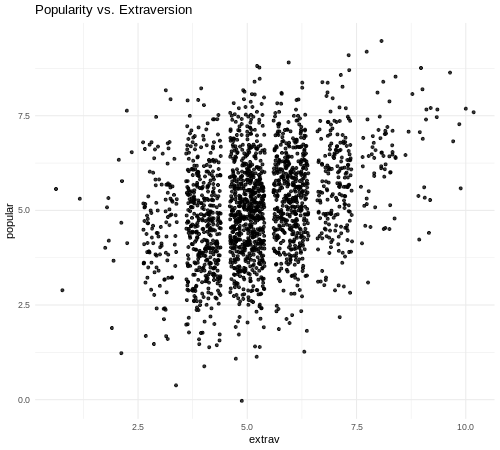

In [13]:
%%R -w 500 -h 450 -u px
ggplot(data  = df,
       aes(x = extrav,
           y = popular))+
  geom_point(size = 1.2,
             alpha = .8,
             position = "jitter")+# to add some random noise for plotting purposes
  theme_minimal()+
  labs(title = "Popularity vs. Extraversion")

### Random Slope Models

Random slope models are used when the effect of a predictor varies across groups. In this case, we are interested in whether the effect of extraversion (`extrav`) on popularity varies across classes. We can include a random slope for `extrav` by adding `(1 + extrav | class)` to the model formula. This specifies that both the intercept and the slope for extraversion can vary across classes.   

In [14]:
%%R

m1<-lmerTest::lmer(formula = popular ~ 1 + sex + extrav + texp + (1 +  extrav | class),
               data    = df)
# summary
jtools::summ(m1)

MODEL INFO:
Observations: 2000
Dependent Variable: popular
Type: Mixed effects linear regression 

MODEL FIT:
AIC = 4850.77, BIC = 4895.58
Pseudo-R² (fixed effects) = 0.51
Pseudo-R² (total) = 0.70 

FIXED EFFECTS:
---------------------------------------------------------
                    Est.   S.E.   t val.      d.f.      p
----------------- ------ ------ -------- --------- ------
(Intercept)         0.74   0.20     3.74    182.10   0.00
sex                 1.25   0.04    34.24   1913.09   0.00
extrav              0.45   0.02    18.39     97.54   0.00
texp                0.09   0.01    10.47    101.66   0.00
---------------------------------------------------------

p values calculated using Satterthwaite d.f.

RANDOM EFFECTS:
------------------------------------
  Group      Parameter    Std. Dev. 
---------- ------------- -----------
  class     (Intercept)     1.14    
  class       extrav        0.19    
 Residual                   0.74    
------------------------------------


Now we refit the model by adding `sex` as  the random slope with  `extrav` to compare the models (`1+sex+extrav |class`)

In [15]:
%%R
m2<-lmerTest::lmer(formula = popular ~ 1 + sex + extrav + texp + (1 + sex+  extrav | class),
               data    = df)
jtools::summ(m2)

MODEL INFO:
Observations: 2000
Dependent Variable: popular
Type: Mixed effects linear regression 

MODEL FIT:
AIC = 4855.26, BIC = 4916.87
Pseudo-R² (fixed effects) = 0.51
Pseudo-R² (total) = 0.70 

FIXED EFFECTS:
--------------------------------------------------------
                    Est.   S.E.   t val.     d.f.      p
----------------- ------ ------ -------- -------- ------
(Intercept)         0.76   0.20     3.84   180.91   0.00
sex                 1.25   0.04    33.86   985.95   0.00
extrav              0.45   0.02    18.37    96.15   0.00
texp                0.09   0.01    10.38   101.31   0.00
--------------------------------------------------------

p values calculated using Satterthwaite d.f.

RANDOM EFFECTS:
------------------------------------
  Group      Parameter    Std. Dev. 
---------- ------------- -----------
  class     (Intercept)     1.16    
  class         sex         0.05    
  class       extrav        0.19    
 Residual                   0.74    
--------

### Random Slopes and Crosslevel Interaction

Random slopes can also be used to model cross-level interactions. In this case, we are interested in whether the effect of extraversion (`extrav`) on popularity varies across classes, depending on the teacher's experience (`texp`). We can include a random slope for `extrav` by adding `(1 + extrav | class))` to the model formula. This specifies that both the intercept and the slope for extraversion can vary across classes, and the interaction between extraversion and teacher experience can also vary across classes.

In [17]:
%%R
m3<-lmer(formula = popular ~ 1 + sex + extrav + texp+ extrav:texp + (1 + extrav | class),
             data    = df)
jtools::summ(m3)

MODEL INFO:
Observations: 2000
Dependent Variable: popular
Type: Mixed effects linear regression 

MODEL FIT:
AIC = 4798.45, BIC = 4848.86
Pseudo-R² (fixed effects) = 0.55
Pseudo-R² (total) = 0.71 

FIXED EFFECTS:
----------------------------------------------------------
                     Est.   S.E.   t val.      d.f.      p
----------------- ------- ------ -------- --------- ------
(Intercept)         -1.21   0.27    -4.45    109.34   0.00
sex                  1.24   0.04    34.24   1941.08   0.00
extrav               0.80   0.04    20.03     72.07   0.00
texp                 0.23   0.02    13.46     98.50   0.00
extrav:texp         -0.02   0.00    -9.68     71.99   0.00
----------------------------------------------------------

p values calculated using Satterthwaite d.f.

RANDOM EFFECTS:
------------------------------------
  Group      Parameter    Std. Dev. 
---------- ------------- -----------
  class     (Intercept)     0.69    
  class       extrav        0.07    
 Residu

Now we refit the model by drooping `sex` and  `extrav` from the model to  compare model with random slope only (`1 |class`)

In [16]:
%%R
m0<-lmerTest::lmer(formula = popular ~ 1 + sex + extrav + texp + extrav:texp + (1 | class),
               data    = df)
jtools::summ(m0)

MODEL INFO:
Observations: 2000
Dependent Variable: popular
Type: Mixed effects linear regression 

MODEL FIT:
AIC = 4796.69, BIC = 4835.90
Pseudo-R² (fixed effects) = 0.55
Pseudo-R² (total) = 0.70 

FIXED EFFECTS:
----------------------------------------------------------
                     Est.   S.E.   t val.      d.f.      p
----------------- ------- ------ -------- --------- ------
(Intercept)         -1.20   0.25    -4.79    709.15   0.00
sex                  1.24   0.04    34.14   1944.87   0.00
extrav               0.80   0.04    22.34   1975.92   0.00
texp                 0.23   0.02    14.66    673.10   0.00
extrav:texp         -0.02   0.00   -10.76   1991.53   0.00
----------------------------------------------------------

p values calculated using Satterthwaite d.f.

RANDOM EFFECTS:
------------------------------------
  Group      Parameter    Std. Dev. 
---------- ------------- -----------
  class     (Intercept)     0.54    
 Residual                   0.75    
-------

### Model Comparison

To assess model improvement, compare models using information criteria such as AIC or likelihood ratio tests.

To compare the two models, we can use the `anova()` function to perform Likelihood ratio tests


In [18]:
%%R
anova(m0,m1,m2, m3)

Data: df
Models:
m0: popular ~ 1 + sex + extrav + texp + extrav:texp + (1 | class)
m1: popular ~ 1 + sex + extrav + texp + (1 + extrav | class)
m3: popular ~ 1 + sex + extrav + texp + extrav:texp + (1 + extrav | class)
m2: popular ~ 1 + sex + extrav + texp + (1 + sex + extrav | class)
   npar    AIC    BIC  logLik deviance  Chisq Df Pr(>Chisq)    
m0    7 4763.5 4802.7 -2374.7   4749.5                         
m1    8 4828.8 4873.6 -2406.4   4812.8  0.000  1          1    
m3    9 4765.6 4816.0 -2373.8   4747.6 65.183  1  6.827e-16 ***
m2   11 4833.3 4894.9 -2405.6   4811.3  0.000  2          1    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [19]:
%%R
AIC(m0,m1,m2, m3)

   df      AIC
m0  7 4796.692
m1  8 4850.768
m2 11 4855.255
m3  9 4798.452


#### Model Interpretaion

We can use {report} package to generate a comprehensive report of the model output.

In [20]:
%%R
report::report(m3)

We fitted a linear mixed model (estimated using REML and nloptwrap optimizer)
to predict popular with sex, extrav and texp (formula: popular ~ 1 + sex +
extrav + texp + extrav:texp). The model included extrav as random effects
(formula: ~1 + extrav | class). The model's total explanatory power is
substantial (conditional R2 = 0.71) and the part related to the fixed effects
alone (marginal R2) is of 0.55. The model's intercept, corresponding to sex =
0, extrav = 0 and texp = 0, is at -1.21 (95% CI [-1.74, -0.68], t(1991) =
-4.45, p < .001). Within this model:

  - The effect of sex is statistically significant and positive (beta = 1.24, 95%
CI [1.17, 1.31], t(1991) = 34.24, p < .001; Std. beta = 0.45, 95% CI [0.42,
0.47])
  - The effect of extrav is statistically significant and positive (beta = 0.80,
95% CI [0.72, 0.88], t(1991) = 20.03, p < .001; Std. beta = 0.41, 95% CI [0.38,
0.44])
  - The effect of texp is statistically significant and positive (beta = 0.23,
95% CI [0.19, 0.26], t

#### Model Performance

Model performance can be assessed using metrics such as Marginal $R^2$ and Conditional $R^2$.

In [21]:
%%R -
performance::model_performance(m3)

        AIC      AICc      BIC R2_conditional R2_marginal        ICC       RMSE
1 -4798.452 -4798.543 -4848.86     -0.7073141  -0.5513508 -0.3476286 -0.7225049
       Sigma
1 -0.7434826


{ggeffects} package supports labelled data and the `plot()` method automatically sets titles, axis - and legend-labels depending on the value and variable labels of the data.



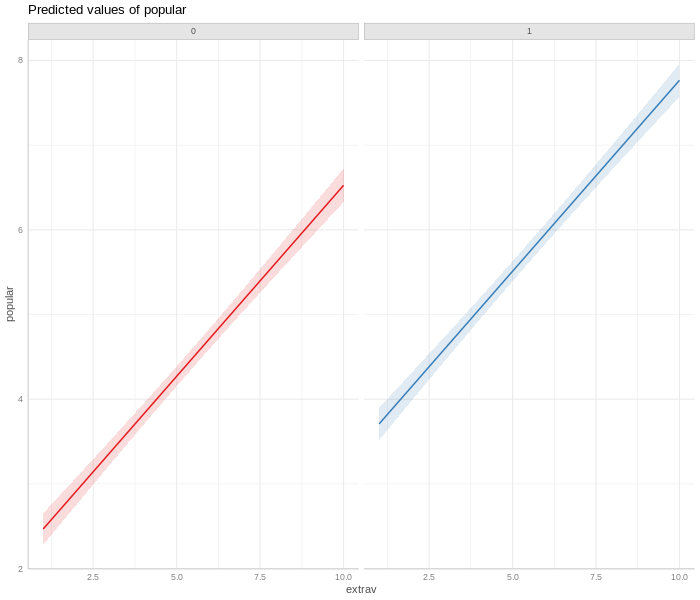

In [22]:
%%R -w 700 -h 600 -u px
plot(ggeffects::predict_response(m3, terms = c("extrav", "sex")), facets = TRUE)

### Using `nlme` Package



In [23]:
%%R
# Full model
model_full_nlme <- lme(fixed =  popular ~ 1 + sex + extrav + texp+ extrav:texp,
                        random = ~ extrav | class, data = df)

# Summary of the model
summary(model_full_nlme)

Linear mixed-effects model fit by REML
  Data: df 
       AIC      BIC    logLik
  4798.452 4848.838 -2390.226

Random effects:
 Formula: ~extrav | class
 Structure: General positive-definite, Log-Cholesky parametrization
            StdDev     Corr  
(Intercept) 0.69185729 (Intr)
extrav      0.07355132 -0.64 
Residual    0.74348329       

Fixed effects:  popular ~ 1 + sex + extrav + texp + extrav:texp 
                 Value  Std.Error   DF  t-value p-value
(Intercept) -1.2096108 0.27190361 1897 -4.44868       0
sex          1.2406978 0.03623250 1897 34.24268       0
extrav       0.8035787 0.04011778 1897 20.03049       0
texp         0.2261975 0.01680748   98 13.45815       0
extrav:texp -0.0247281 0.00255474 1897 -9.67934       0
 Correlation: 
            (Intr) sex    extrav texp  
sex          0.002                     
extrav      -0.867 -0.065              
texp        -0.916 -0.047  0.801       
extrav:texp  0.773  0.033 -0.901 -0.859

Standardized Within-Group Residuals:
   

In [24]:
%%R
performance(model_full_nlme)


# Indices of model performance

AIC      |     AICc |      BIC | R2 (cond.) | R2 (marg.) |   ICC |  RMSE | Sigma
--------------------------------------------------------------------------------
4798.452 | 4798.543 | 4848.860 |      0.707 |      0.551 | 0.348 | 0.723 | 0.743


## Summary and Concusion

In this tutorial, we learned about random slope models, which allow the effect of a predictor to vary across groups. We discussed the key features of random slope models, including the decomposition of variability into between-group and within-group components. We also demonstrated how to estimate the parameters of a random slope model from scratch using Restricted Maximum Likelihood (REML) and optimize the log-likelihood function. We then applied random slope models to the popularity data set using the {lme4} package in R. We fitted random slope models with varying effects of extraversion on popularity across classes and included cross-level interactions between extraversion and teacher experience. We compared the models using information criteria and likelihood ratio tests and interpreted the results. Finally, we evaluated the model performance and visualized the results using the {ggeffects} package.

## References

### Books:

1. **"Multilevel and Longitudinal Modeling Using R" by Douglas A. Luke**
   - This book provides a practical guide to the use of multilevel modeling in applied research, covering both the theory and application of multilevel modeling techniques using R.

2. **"Multilevel Analysis: Techniques and Applications" by Joop Hox**
   - This book is an introduction to multilevel analysis, focusing on the practical application of multilevel modeling techniques using R.

3. **"Hierarchical Linear Models: Applications and Data Analysis Methods" by Stephen W. Raudenbush and Anthony S. Bryk**
   - This book provides a comprehensive introduction to hierarchical linear modeling (HLM) and its applications, including examples and applications in R.

4. **"Applied Multilevel Analysis" by Jos Twisk**
   - This book is a practical guide to the use of multilevel analysis in applied research, covering both the theory and application of multilevel modeling techniques using R.

### Online Tutorials:

 1. [LME4 Tutorial: Popularity Data](https://www.rensvandeschoot.com/tutorials/lme4/)

2. **"Random Intercept and Random Slope Models in R" by DataCamp**
   - URL: [DataCamp Guide](https://www.datacamp.com/community/tutorials/random-intercept-random-slope-models-r)
   - This tutorial covers the basics of random intercept and random slope models in R, including practical examples using the lme4 package.

3. **"Linear Mixed-Effects Modeling in R: A Step-by-Step Tutorial" by Towards Data Science**
   - URL: [Towards Data Science Tutorial](https://towardsdatascience.com/linear-mixed-effects-modeling-in-r-61b9f845f623)
   - This tutorial provides a step-by-step guide to linear mixed-effects modeling in R, with practical examples and code.





